In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [3]:
df = pd.read_csv('Dataset_Ads.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Income           10000 non-null  float64
 3   Location         10000 non-null  object 
 4   Ad Type          10000 non-null  object 
 5   Ad Topic         10000 non-null  object 
 6   Ad Placement     10000 non-null  object 
 7   Clicks           10000 non-null  int64  
 8   Click Time       10000 non-null  object 
 9   Conversion Rate  10000 non-null  float64
 10  CTR              10000 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 859.5+ KB
None


In [39]:
df['Ad Type'].value_counts()

Banner    2521
Video     2480
Native    2430
Text      2423
Name: Ad Type, dtype: int64

In [43]:
gender_counts = df.Gender.value_counts()
gender_counts

Male      4915
Female    3896
Other     1043
Name: Gender, dtype: int64

In [75]:
df['Ad Topic'].value_counts()

Finance       1710
Travel        1649
Fashion       1638
Technology    1631
Food          1626
Health        1600
Name: Ad Topic, dtype: int64

In [16]:
df.Location.value_counts()

Rural       3408
Suburban    3307
Urban       3285
Name: Location, dtype: int64

In [21]:
df.describe()

,Age,Income,Clicks,Conversion Rate,CTR
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.235200,50080.040922,5.030600,0.202246,0.050425
std,14.790752,19935.832667,2.258046,0.121094,0.019821
min,-21.000000,-38932.640000,0.000000,0.001000,0.000000
25%,24.000000,36892.040000,3.000000,0.109500,0.037100
50%,34.000000,50122.520000,5.000000,0.180650,0.050300
75%,44.000000,63271.342500,6.000000,0.275100,0.063700
max,92.000000,126635.800000,17.000000,0.731700,0.127200


In [24]:
df = df[(df['Age']>=0) & (df['Income']>=0)]
df.describe()

,Age,Income,Clicks,Conversion Rate,CTR
count,9854.000000,9854.000000,9854.000000,9854.000000,9854.000000
mean,34.526994,50474.607773,5.032068,0.202228,0.050406
std,14.430691,19437.638870,2.261946,0.121195,0.019826
min,0.000000,165.210000,0.000000,0.001000,0.000000
25%,24.000000,37178.952500,3.000000,0.109500,0.037100
50%,34.000000,50276.450000,5.000000,0.180200,0.050300
75%,44.000000,63405.422500,6.000000,0.274875,0.063700
max,92.000000,126635.800000,17.000000,0.731700,0.127200


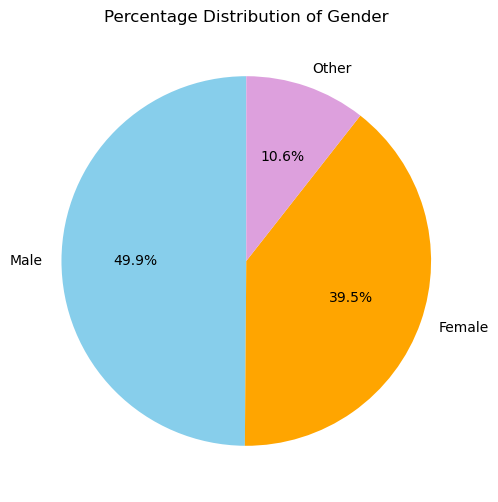

In [61]:
gender_counts = df['Gender'].value_counts(normalize=True) * 100  # Normalize to get percentages

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors =['skyblue', 'orange','plum' ])
plt.title("Percentage Distribution of Gender")
plt.show()

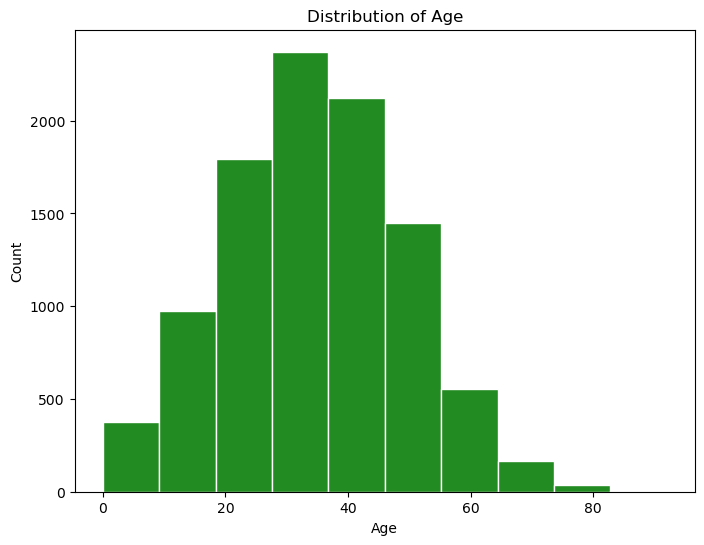

In [66]:
plt.figure(figsize=(8,6))
plt.hist(df.Age, color='forestgreen',edgecolor='white')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

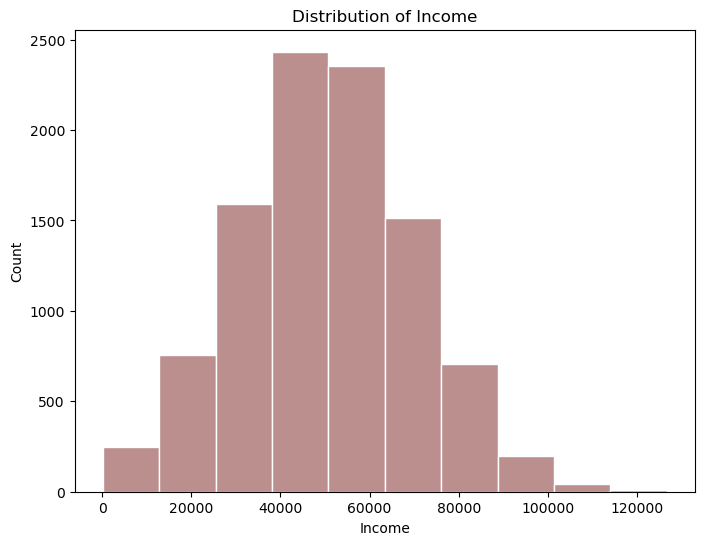

In [73]:
plt.figure(figsize=(8,6))
plt.hist(df.Income, color='rosybrown',edgecolor='white')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

/var/folders/kh/nhc2z66x4znd8j227lnt58kc0000gn/T/ipykernel_2068/203566602.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='viridis')


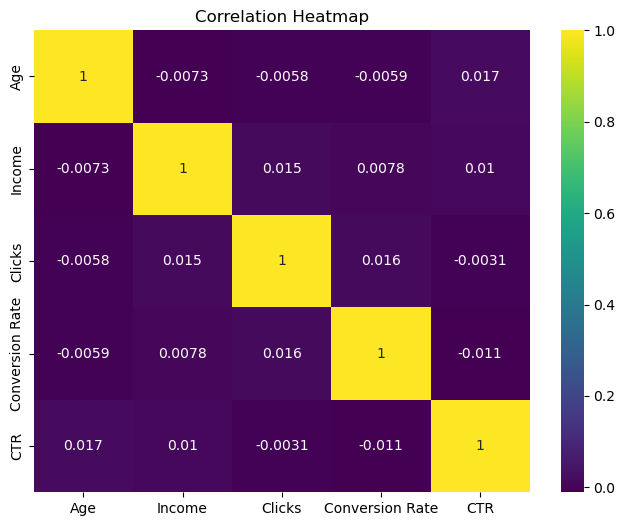

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True,cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

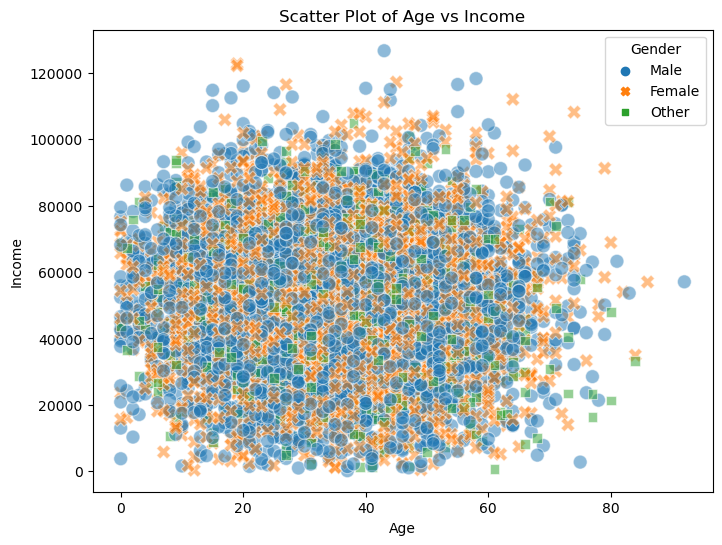

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Income', hue='Gender', style='Gender', s=100, alpha=0.5)
plt.title("Scatter Plot of Age vs Income")
plt.show()

In [30]:
df.groupby('Gender')['Conversion Rate'].mean()

Gender
Female    0.201570
Male      0.203475
Other     0.198807
Name: Conversion Rate, dtype: float64

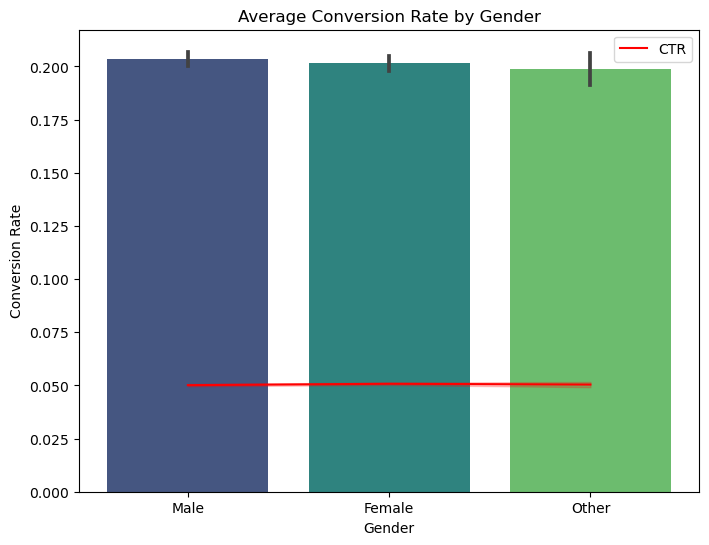

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Gender', y='Conversion Rate', estimator=np.mean, palette='viridis')
sns.lineplot(data=df, x= 'Gender', y='CTR', color='red', label='CTR')
plt.title("Average Conversion Rate by Gender")
plt.show()

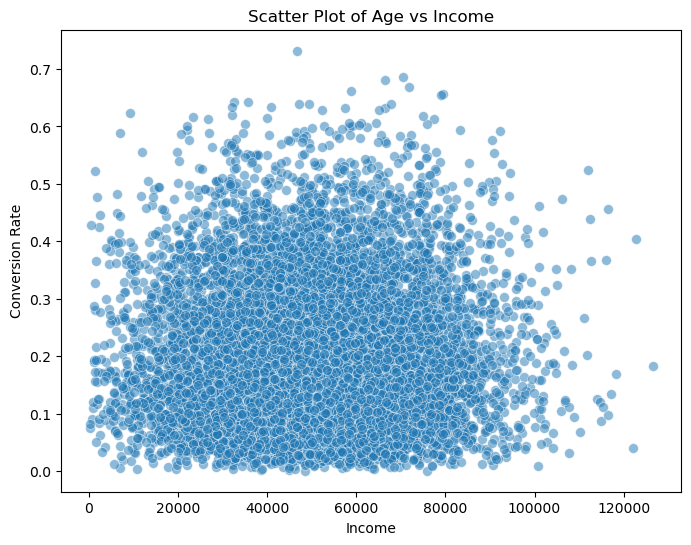

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Conversion Rate', s=50, alpha=0.5)
plt.title("Scatter Plot of Age vs Income")
plt.show()

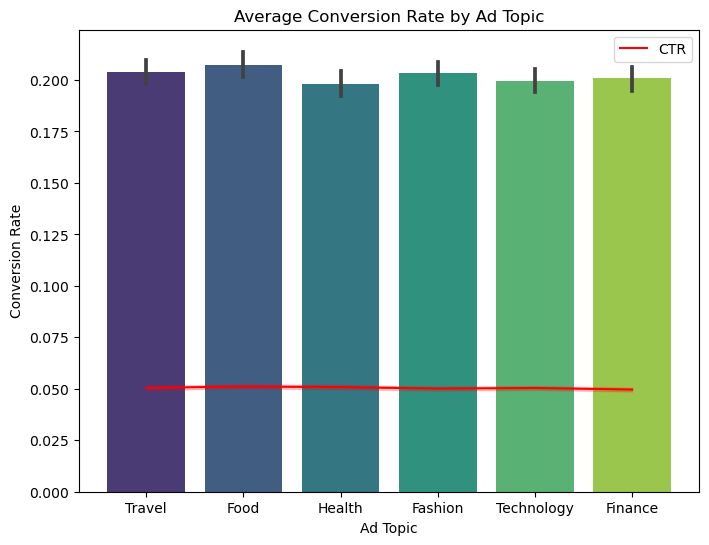

In [76]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Ad Topic', y='Conversion Rate', estimator=np.mean, palette='viridis')
sns.lineplot(data=df, x= 'Ad Topic', y='CTR', color='red', label='CTR')
plt.title("Average Conversion Rate by Ad Topic")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Ad Topic', y='Conversion Rate', estimator=np.mean, palette='viridis')
sns.lineplot(data=df, x= 'Ad Topic', y='CTR', color='red', label='CTR')
plt.title("Average Conversion Rate by Ad Topic")
plt.show()

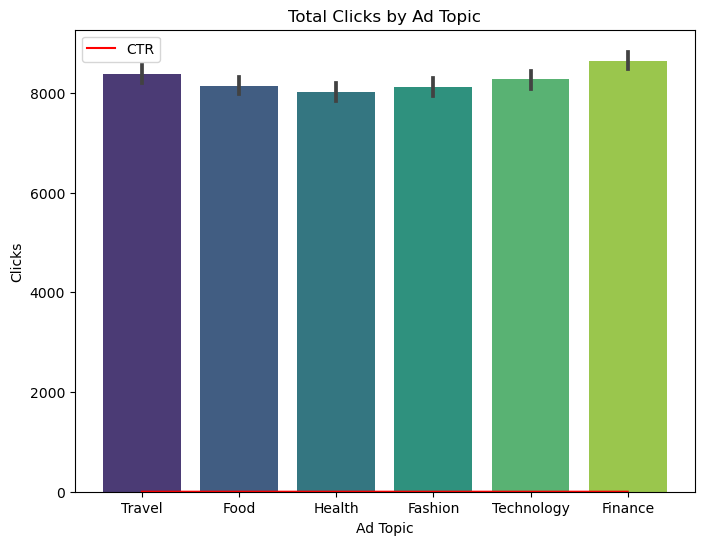

In [82]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Ad Topic', y='Clicks', estimator=sum, palette='viridis')
sns.lineplot(data=df.groupby('Ad Topic')['Conversion Rate'].mean().reset_index(name='Conversion Rate'), x= 'Ad Topic', y='Conversion Rate', color='red', label='CTR')
plt.title('Total Clicks by Ad Topic')
plt.show()

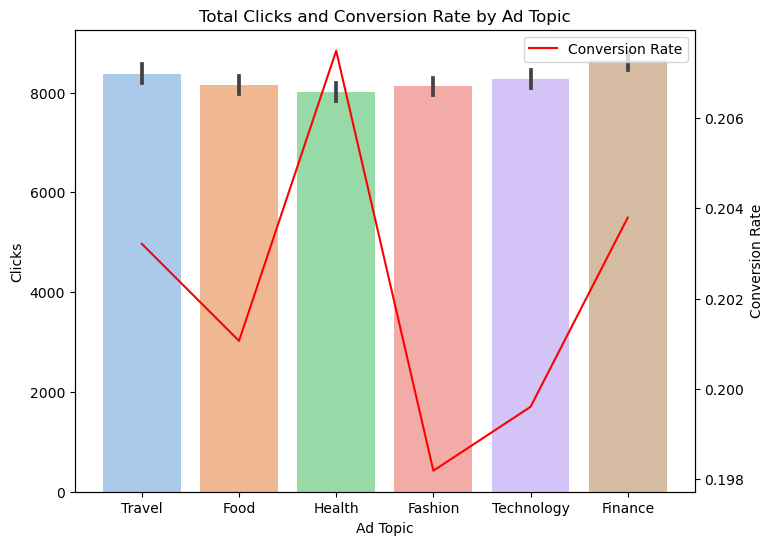

In [85]:
plt.figure(figsize=(8, 6))

# Bar plot for Clicks
sns.barplot(data=df, x='Ad Topic', y='Clicks', estimator=sum, palette='pastel')

# Create a twin Axes sharing the x-axis
ax2 = plt.gca().twinx()

# Line plot for Conversion Rate on the secondary y-axis
sns.lineplot(data=df.groupby('Ad Topic')['Conversion Rate'].mean().reset_index(name='Conversion Rate'),
             x='Ad Topic', y='Conversion Rate', color='red', label='Conversion Rate', ax=ax2)

# Set title and labels
plt.title('Total Clicks and Conversion Rate by Ad Topic')
ax2.set_ylabel('Conversion Rate')  # Y-axis label for the secondary axis

# Show the plot
plt.show()

In [10]:
cat_cols = ['Gender', 'Location','Ad Type','Ad Topic','Ad Placement']

# Initialize the encoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the data, then convert it to a DataFrame
encoded_array = encoder.fit_transform(df[cat_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cat_cols))

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df.drop(columns=cat_cols), encoded_df], axis=1)
print(df_encoded)

      Age    Income  Clicks                  Click Time  Conversion Rate  \
0      61  35717.43       3  2024-01-18 20:45:56.898459           0.0981   
1      41  47453.25       5  2023-04-24 20:45:56.898459           0.0937   
2      49  68126.35       4  2024-02-24 20:45:56.898459           0.1912   
3      68  64585.73       6  2023-12-13 20:45:56.898459           0.1122   
4      63  21109.40       5  2023-07-02 20:45:56.898459           0.1426   
...   ...       ...     ...                         ...              ...   
9995    7  69925.29       5  2023-05-31 20:45:56.927349           0.2460   
9996   35  42182.75       9  2023-09-01 20:45:56.927349           0.2664   
9997   42  55084.12       3  2023-11-15 20:45:56.927349           0.2354   
9998   34  39382.80       4  2023-05-23 20:45:56.927349           0.1725   
9999   54  66441.59       2  2023-11-21 20:45:56.927349           0.0307   

         CTR  Gender_Male  Gender_Other  Location_Suburban  Location_Urban  \
0     0.0